In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm

Load the 3 datasets (all extracted features included)

In [2]:
X_train = pd.read_csv("../train_val_test_datasets/X_train.csv") 
X_val = pd.read_csv("../train_val_test_datasets/X_val.csv") 
X_test = pd.read_csv("../train_val_test_datasets/X_test.csv")

y_train = pd.read_csv("../train_val_test_datasets/y_train.csv") 
y_val = pd.read_csv("../train_val_test_datasets/y_val.csv")
y_test = pd.read_csv("../train_val_test_datasets/y_test.csv")

Choose selected features with respect to different methods. Define a file to save the results

In [3]:
results_file = r"../classifiers_results/feature_selection_rfe_results.txt"
selected_features_list = 'rfe.txt'
f = open(results_file, "w")

# Get selected features

Folder 'important_features' includes .txt files which contain the features that each feature selection method selected

In [4]:
selected_feats=[]
with open(r'../important_features/'+selected_features_list, 'r') as fp:
    for line in fp:
        x = line[:-1]
        selected_feats.append(x)

X_train = X_train[selected_feats] #extract only these features
X_val = X_val[selected_feats]
X_test = X_test[selected_feats]

In [5]:
print(f' {len(selected_feats)} features have been selected')

 68 features have been selected


# Model selection

In [6]:
scaler = StandardScaler()
s = scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
def print_metrics(y_val,y_pred,f,classifier):
    f.write(f'{classifier} Precision: {precision_score(y_val,y_pred)}\n')
    f.write(f'{classifier} Recall: {recall_score(y_val,y_pred)}\n')
    f.write(f'{classifier} f1_score: {f1_score(y_val,y_pred)}\n')
    f.write(f'{classifier} Accuracy: {accuracy_score(y_val,y_pred)}\n')
    f.write('---------------------------------------------------------------------------\n')
    '''
    print(f'{classifier} Precision: {precision_score(y_val,y_pred)}')
    print(f'{classifier} Recall: {recall_score(y_val,y_pred)}')
    print(f'{classifier} f1_score: {f1_score(y_val,y_pred)}')
    print(f'{classifier} Accuracy: {accuracy_score(y_val,y_pred)}')
    '''

# Logistic Regression

In [8]:
params = {'penalty' : ['l1', 'l2', 'none','elasticnet'], 
          'C' : [0.01, 0.1, 1, 10, 100, 1000] }

log_reg_models = []
for p in params['penalty']:
    for c in params['C']:
        l1_ratio = 0.1 if p == 'elasticnet' else None
        clf = LogisticRegression(penalty=p,C=c,random_state=0,max_iter=5000,solver='saga',l1_ratio=l1_ratio).fit(X_train, y_train) 
       
        y_pred_train = clf.predict(X_train)
        y_pred_val = clf.predict(X_val)
        
        f1_train = f1_score(y_train,y_pred_train)
        f1_val = f1_score(y_val,y_pred_val)
        
        log_reg_models.append((clf,f1_val,abs(f1_val-f1_train)))

In [9]:
for i in range(len(log_reg_models)):
    if log_reg_models[i][1] > 0.6:
        print(log_reg_models[i][1],log_reg_models[i][2],i)
        
model_selected = log_reg_models[18][0]
print(model_selected)

0.6133333333333334 0.1409770114942529 1
0.64 0.16932203389830502 2
0.6410256410256411 0.17696151100862012 3
0.65 0.1662393162393161 4
0.6419753086419753 0.17426400759734084 5
0.6571428571428571 0.09506953223767389 6
0.6133333333333334 0.17039257673090646 7
0.6233766233766234 0.19538670284938953 8
0.6410256410256411 0.17521367521367504 9
0.6582278481012658 0.15547664868674282 10
0.6419753086419753 0.17426400759734084 11
0.6419753086419753 0.17426400759734084 12
0.6419753086419753 0.17426400759734084 13
0.6419753086419753 0.17426400759734084 14
0.6419753086419753 0.17426400759734084 15
0.6419753086419753 0.17426400759734084 16
0.6419753086419753 0.17426400759734084 17
0.6944444444444444 0.047277409860191355 18
0.6301369863013698 0.15865611714690608 19
0.6233766233766234 0.19538670284938953 20
0.6410256410256411 0.17521367521367504 21
0.65 0.16370449678800858 22
0.6419753086419753 0.17426400759734084 23
LogisticRegression(C=0.01, l1_ratio=0.1, max_iter=5000, penalty='elasticnet',
        

Test set metrics:
Precision: 0.6097560975609756
Recall: 0.8333333333333334
f1_score: 0.7042253521126761
Accuracy: 0.8306451612903226

Confusion matrix:


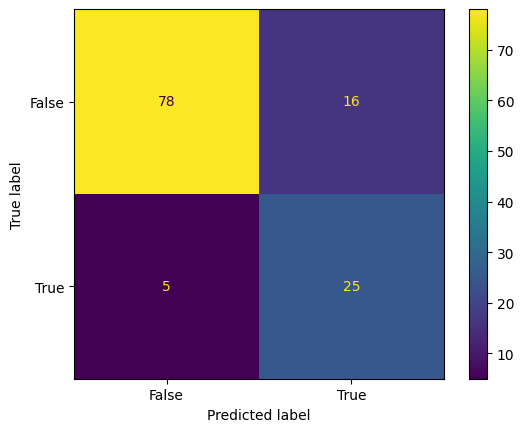

In [10]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"Logistic Regression")

# SVM

In [11]:
params = {'C' : [0.01, 0.1, 1, 10, 100, 1000],
         'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'gamma' : ['scale','auto'] }

svm_models = []
for c in params['C']:
    for k in params['kernel']:
        for g in params['gamma']:
        
            clf = svm.SVC(C=c,kernel=k,gamma=g).fit(X_train, y_train) 
       
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_val)

            f1_train = f1_score(y_train,y_pred_train)
            f1_val = f1_score(y_val,y_pred_val)

            svm_models.append((clf,f1_val,abs(f1_val-f1_train)))

In [12]:
for i in range(len(svm_models)):
    if svm_models[i][1] > 0.65:
        print(svm_models[i][1],svm_models[i][2],i)
        
model_selected = svm_models[14][0]
print(model_selected)

0.704225352112676 0.02317019623737626 14
0.704225352112676 0.02317019623737626 15
0.6567164179104478 0.26897360332097464 20
0.6567164179104478 0.26897360332097464 21
0.6585365853658536 0.016960103375868285 22
0.6585365853658536 0.016960103375868285 23
SVC(C=0.1, kernel='sigmoid')


Test set metrics:
Precision: 0.6875
Recall: 0.7333333333333333
f1_score: 0.7096774193548386
Accuracy: 0.8548387096774194

Confusion matrix:


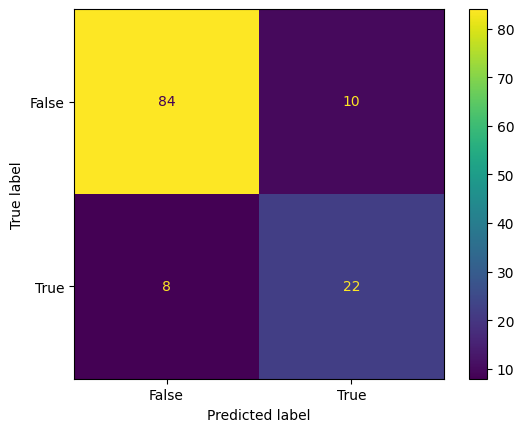

In [13]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"SVM")

# Naive Bayes

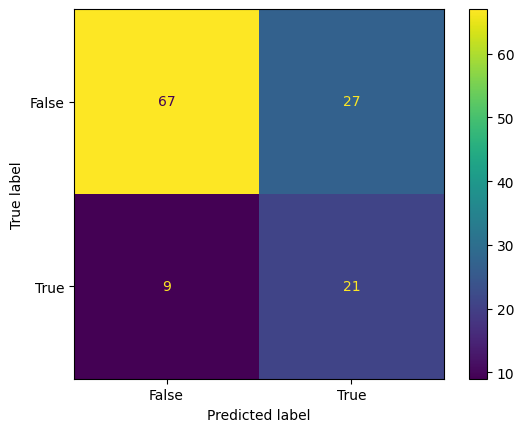

In [14]:
new_X_train = np.append(X_train,X_val,axis=0)
new_y_train = np.append(y_train,y_val,axis=0)

clf2 = GaussianNB()
clf2.fit(new_X_train, new_y_train)
y_pred = clf2.predict(X_test)
print_metrics(y_test,y_pred,f,"Naive Bayes")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# KNN

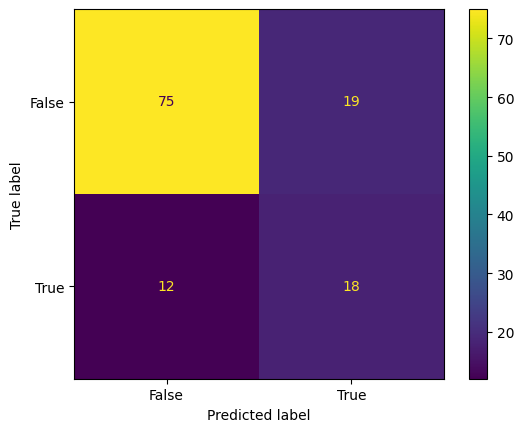

In [15]:
clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(new_X_train, new_y_train)
y_pred = clf3.predict(X_test)
print_metrics(y_test,y_pred,f,"KNN")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# Decision Tree

In [16]:
params = {'criterion' : ['gini', 'entropy', 'log_loss'],
         'splitter' : ['best', 'random'],
         'max_depth' : [10,50,100,200,500],
         'min_samples_split': [2,5,10,20,40],
         'min_samples_leaf': [1,5,10,20,50]}

tree_models = []
for c in params['criterion']:
    for s in params['splitter']:
        for md in params['max_depth']:
            for mss in params['min_samples_split']:
                for msl in params['min_samples_leaf']:
                    
                    clf = tree.DecisionTreeClassifier(criterion=c,splitter=s,max_depth=md,min_samples_split=mss,min_samples_leaf=msl).fit(X_train, y_train) 

                    y_pred_train = clf.predict(X_train)
                    y_pred_val = clf.predict(X_val)

                    f1_train = f1_score(y_train,y_pred_train)
                    f1_val = f1_score(y_val,y_pred_val)

                    tree_models.append((clf,f1_val,abs(f1_val-f1_train)))


In [17]:
for i in range(len(tree_models)):
    if tree_models[i][1] >= 0.6:
        print(tree_models[i][1],tree_models[i][2],i)
        
model_selected = tree_models[458][0]
print(model_selected)

0.6153846153846153 0.09489575844716036 171
0.6170212765957447 0.043018484835666726 404
0.617283950617284 0.008308466444327367 439
0.6190476190476191 0.19953645174884116 466
0.6046511627906975 0.37189467942678645 480
0.6666666666666667 0.11350574712643668 487
0.6136363636363636 0.3217084639498432 625
0.6744186046511628 0.18458356454623426 656
DecisionTreeClassifier(criterion='entropy', max_depth=200, min_samples_leaf=20,
                       min_samples_split=5, splitter='random')


Test set metrics:
Precision: 0.4074074074074074
Recall: 0.7333333333333333
f1_score: 0.5238095238095238
Accuracy: 0.6774193548387096

Confusion matrix:


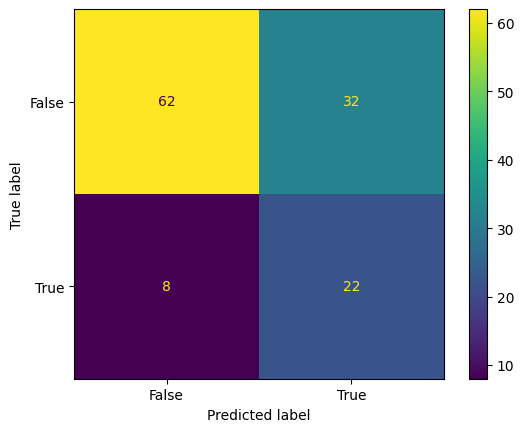

In [18]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"Decision Tree")

# LDA

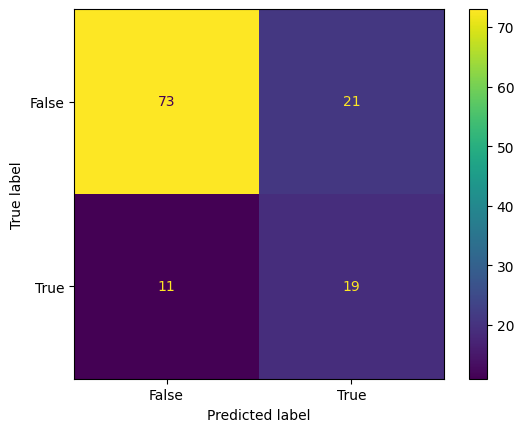

In [19]:
clf5 = LinearDiscriminantAnalysis()
clf5.fit(new_X_train, new_y_train)
y_pred = clf5.predict(X_test)
print_metrics(y_test,y_pred,f,"LDA")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# QDA

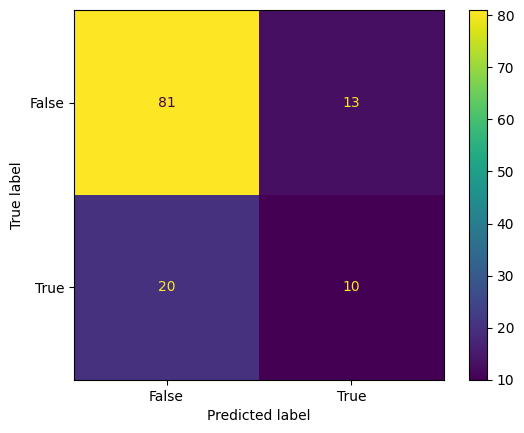

In [20]:
clf6 = QuadraticDiscriminantAnalysis()
clf6.fit(new_X_train, new_y_train)
y_pred = clf6.predict(X_test)
print_metrics(y_test,y_pred,f,"QDA")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# ADABOOST

In [21]:
params = {'n_estimators' : [10, 50, 100],
         'learning_rate' : [0.1, 0.5, 0.8, 1.0],
         'algorithm' : ['SAMME','SAMME.R'] }

ada_models = []
for est in params['n_estimators']:
    for lr in params['learning_rate']:
        for a in params['algorithm']:
        
            clf = AdaBoostClassifier(n_estimators=est, random_state=0, learning_rate=lr, algorithm=a).fit(X_train, y_train)
       
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_val)

            f1_train = f1_score(y_train,y_pred_train)
            f1_val = f1_score(y_val,y_pred_val)

            ada_models.append((clf,f1_val,abs(f1_val-f1_train)))


In [22]:
for i in range(len(ada_models)):
    if ada_models[i][1] > 0.6:
        print(ada_models[i][1],ada_models[i][2],i)
        
model_selected = ada_models[22][0]
print(model_selected)

0.6233766233766234 0.23884559884559886 14
0.6216216216216217 0.3083146841108624 15
0.6075949367088608 0.25140723248853625 18
0.6493506493506495 0.3080961591599889 19
0.6486486486486487 0.2500855285665413 20
0.6153846153846153 0.36987854251012153 21
0.6842105263157895 0.23459289248762927 22
0.6578947368421053 0.34000882709919455 23
AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)


Test set metrics:
Precision: 0.5106382978723404
Recall: 0.8
f1_score: 0.6233766233766233
Accuracy: 0.7661290322580645

Confusion matrix:


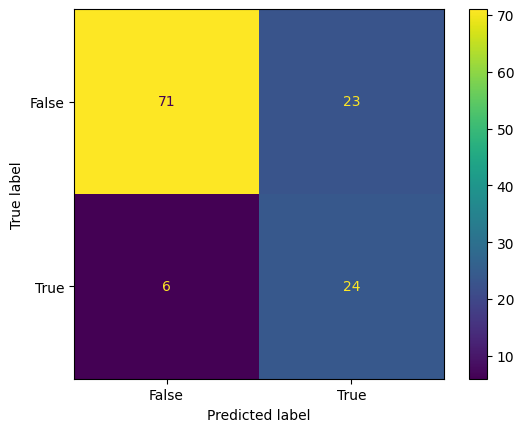

In [23]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"ADABOOST")

In [24]:
f.close()